In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, SpatialDropout2D
from keras.utils import to_categorical
from keras.optimizers import Adam

https://www.kaggle.com/datasets/simjeg/lymphoma-subtype-classification-fl-vs-cll/download?datasetVersionNumber=3

In [2]:
x = np.load('data/X.npy')
y = np.load('data/Y.npy')

In [3]:
max_val = abs(x).max()
scale = len(str(int(max_val)))
x = x / (10 ** scale)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

F:\anaconda\envs\gpu\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


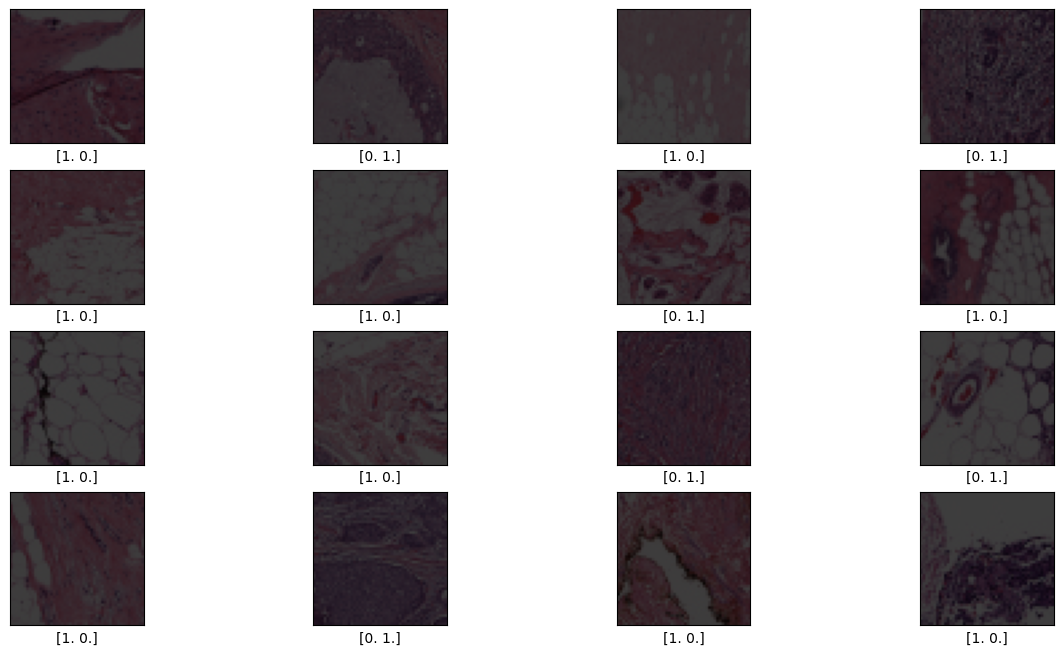

In [6]:
fig = plt.figure(figsize = (15,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])

In [7]:
input_shape = (x_train.shape[1], x_train.shape[2], 3)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [10]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

F:\anaconda\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
with tf.device('/gpu:0'):
  metrics = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
139/139 [==============================] - 7s 14ms/step - loss: 0.6718 - accuracy: 0.5756
Epoch 2/10
139/139 [==============================] - 2s 18ms/step - loss: 0.5782 - accuracy: 0.7183
Epoch 3/10
139/139 [==============================] - 3s 18ms/step - loss: 0.5667 - accuracy: 0.7235
Epoch 4/10
139/139 [==============================] - 2s 16ms/step - loss: 0.5524 - accuracy: 0.7350
Epoch 5/10
139/139 [==============================] - 2s 12ms/step - loss: 0.5456 - accuracy: 0.7451
Epoch 6/10
139/139 [==============================] - 2s 15ms/step - loss: 0.5473 - accuracy: 0.7422
Epoch 7/10
139/139 [==============================] - 2s 13ms/step - loss: 0.5392 - accuracy: 0.7512
Epoch 8/10
139/139 [==============================] - 2s 15ms/step - loss: 0.5318 - accuracy: 0.7415
Epoch 9/10
139/139 [==============================] - 6s 43ms/step - loss: 0.5307 - accuracy: 0.7496
Epoch 10/10
139/139 [==============================] - 2s 17ms/step - loss: 0.5252 - accura

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)

35/35 [==============================] - 1s 9ms/step - loss: 0.4902 - accuracy: 0.7685


In [13]:
print(accuracy)

0.76846843957901
